In [77]:
import pandas as pd
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [78]:
customers = pd.read_csv('../data/olist_customers_dataset.csv')
geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')
sellers = pd.read_csv('../data/olist_sellers_dataset.csv')
product_cat_name = pd.read_csv('../data/product_category_name_translation.csv')

In [79]:
df1 = reduce(lambda x,y: pd.merge(x,y, on='order_id', how='inner'), [order_items, orders, order_payments, order_reviews])
df2 = reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='inner'), [df1, customers])
df3 = reduce(lambda x,y: pd.merge(x,y, on='product_id', how='inner'), [df2, products])
df4 = reduce(lambda x,y: pd.merge(x,y, on='seller_id', how='inner'), [df3, sellers])
df5 = reduce(lambda x,y: pd.merge(x,y, on='product_category_name', how='inner'), [df4, product_cat_name])
df5

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,923.0,5.0,1000.0,25.0,25.0,25.0,17201,jau,SP,arts_and_craftmanship
115605,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,660.0,3.0,500.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship
115606,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,942.0,5.0,500.0,21.0,7.0,14.0,17201,jau,SP,arts_and_craftmanship
115607,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,654.0,3.0,200.0,16.0,6.0,16.0,17201,jau,SP,arts_and_craftmanship


In [117]:
df = df5.copy()

In [118]:
len(df)

115609

In [119]:
df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_cate

In [120]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')

In [121]:
df = df[['order_id','order_purchase_timestamp','customer_state','customer_city','customer_zip_code_prefix','payment_value']]
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].str[:10]
df = df.sort_values(by=['order_purchase_timestamp','customer_state']).reset_index(drop=True)
df

,order_id,order_purchase_timestamp,customer_state,customer_city,customer_zip_code_prefix,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04,RR,boa vista,69309,136.23
1,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04,RR,boa vista,69309,136.23
2,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05,RS,passo fundo,99025,75.06
3,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02,SP,sao paulo,2975,109.34
4,ae8a60e4b03c5a4ba9ca0672c164b181,2016-10-03,GO,mozarlandia,76700,154.57
...,...,...,...,...,...,...
115604,d03ca98f59480e7e76c71fa83ecd8fb6,2018-08-29,SP,salto,13322,119.42
115605,fb393211459aac00af932cd7ab4fa2cc,2018-08-29,SP,hortolandia,13184,106.95
115606,912859fef5a0bd5059b6d48fa79d121a,2018-08-29,SP,sao bernardo do campo,9625,178.25
115607,03ef5dedbe7492bdae72eec50764c43f,2018-08-29,SP,sao caetano do sul,9541,33.23


In [147]:
df_state_pivot = pd.pivot_table(data=df, index=['order_purchase_timestamp','customer_state'], values='payment_value', aggfunc='sum')
df_state_pivot = df_state_pivot.reset_index()
df_state_pivot

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-05,RS,75.06
2,2016-10-02,SP,109.34
3,2016-10-03,GO,154.57
4,2016-10-03,MG,92.27
...,...,...,...
10622,2018-08-28,SP,4232.81
10623,2018-08-29,MG,61.29
10624,2018-08-29,PR,1021.92
10625,2018-08-29,SP,3179.45


In [145]:
state_list = df['customer_state'].unique()
date = df['order_purchase_timestamp'].unique()
df_tmp = pd.DataFrame(columns=['order_purchase_timestamp','customer_state','payment_value'])

date_list = []
state_list_ = []

for i, state in enumerate(state_list):
    for day in date:
        date_list.append(day)
        state_list_.append(state)

df_tmp['order_purchase_timestamp'] = date_list
df_tmp['customer_state'] = state_list_
df_tmp = df_tmp.sort_values(by='order_purchase_timestamp').reset_index(drop=True)
df_tmp

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,NaN
1,2016-09-04,TO,NaN
2,2016-09-04,MG,NaN
3,2016-09-04,AL,NaN
4,2016-09-04,RO,NaN
...,...,...,...
16600,2018-09-03,RJ,NaN
16601,2018-09-03,PR,NaN
16602,2018-09-03,RN,NaN
16603,2018-09-03,AC,NaN


In [157]:
df_state_pivot

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-05,RS,75.06
2,2016-10-02,SP,109.34
3,2016-10-03,GO,154.57
4,2016-10-03,MG,92.27
...,...,...,...
10622,2018-08-28,SP,4232.81
10623,2018-08-29,MG,61.29
10624,2018-08-29,PR,1021.92
10625,2018-08-29,SP,3179.45


In [158]:
df_tmp

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-04,TO,NaN
2,2016-09-04,MG,NaN
3,2016-09-04,AL,NaN
4,2016-09-04,RO,NaN
...,...,...,...
16600,2018-09-03,RJ,NaN
16601,2018-09-03,PR,NaN
16602,2018-09-03,RN,NaN
16603,2018-09-03,AC,NaN


In [159]:
from tqdm import tqdm

date = df['order_purchase_timestamp'].unique()

for day in tqdm(date):
    globals()['df_{}'.format(day)] = df_state_pivot[df_state_pivot['order_purchase_timestamp']==day]
    for idx, row in globals()['df_{}'.format(day)].iterrows():
        target = (row['order_purchase_timestamp'], row['customer_state'])
        for idx_tmp, row_tmp in df_tmp.iterrows():
            if (row_tmp['order_purchase_timestamp'], row_tmp['customer_state']) == target:
                df_tmp.loc[idx_tmp, 'payment_value'] = row['payment_value']

df_tmp

100%|██████████| 615/615 [52:38<00:00,  5.14s/it]


,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-04,TO,NaN
2,2016-09-04,MG,NaN
3,2016-09-04,AL,NaN
4,2016-09-04,RO,NaN
...,...,...,...
16600,2018-09-03,RJ,NaN
16601,2018-09-03,PR,NaN
16602,2018-09-03,RN,NaN
16603,2018-09-03,AC,NaN


In [166]:
df_tmp = df_tmp.fillna(0)
df_tmp

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-04,TO,0.00
2,2016-09-04,MG,0.00
3,2016-09-04,AL,0.00
4,2016-09-04,RO,0.00
...,...,...,...
16600,2018-09-03,RJ,0.00
16601,2018-09-03,PR,0.00
16602,2018-09-03,RN,0.00
16603,2018-09-03,AC,0.00


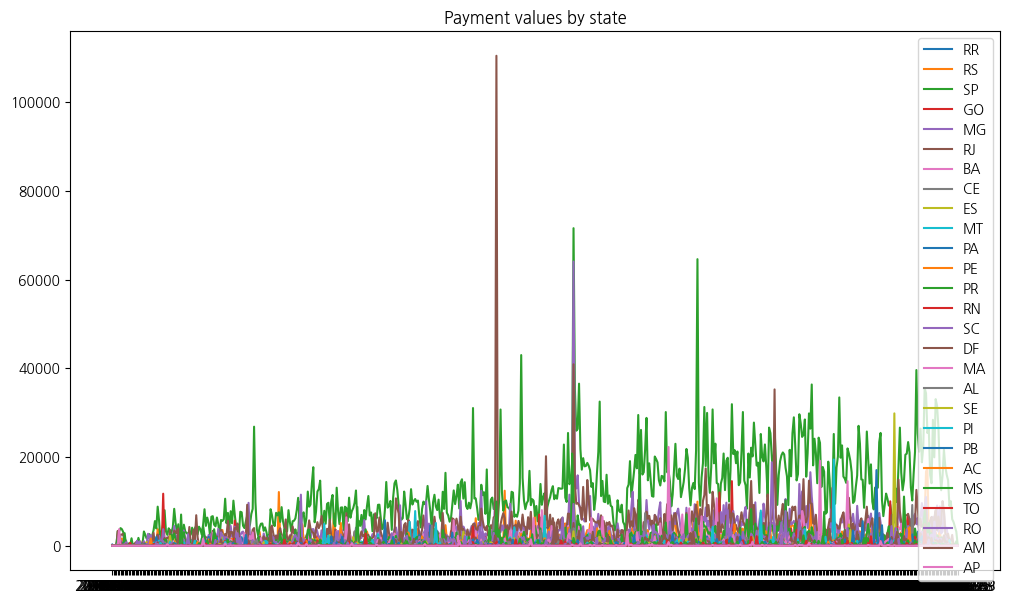

In [163]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

for state in state_list:
    globals()['df_{}'.format(state)] = df_tmp[df_tmp['customer_state']==state].reset_index()
    globals()['payment_{}'.format(state)] = globals()['df_{}'.format(state)]['payment_value']
    days = df_tmp['order_purchase_timestamp'].unique()

    ax.plot(days, globals()['payment_{}'.format(state)], label=state)

plt.legend()
plt.title('Payment values by state')
plt.show()



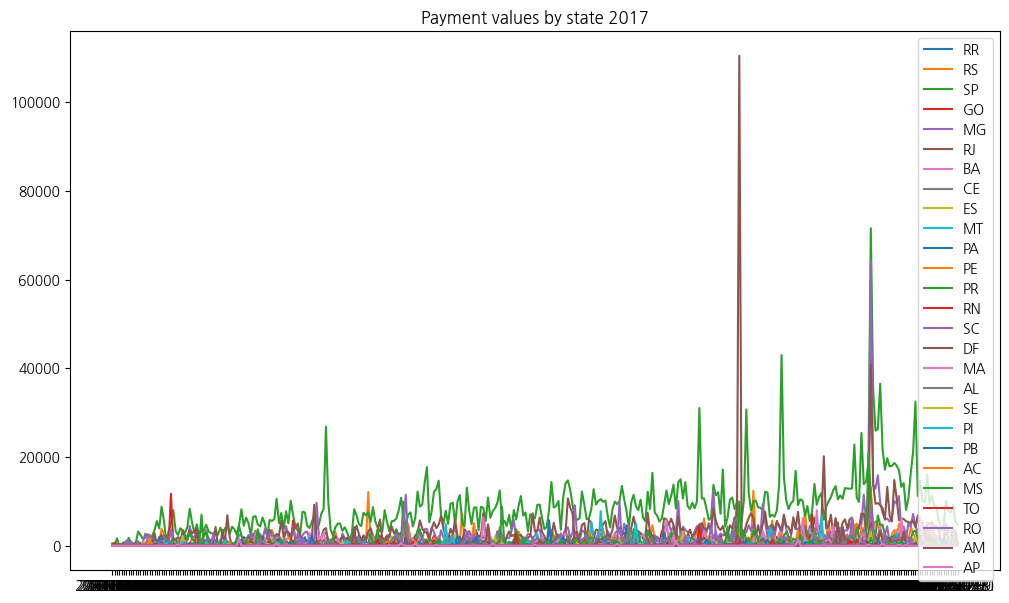

In [178]:
df_2017 = df_tmp[(df_tmp['order_purchase_timestamp']>='2017-01-01')&(df_tmp['order_purchase_timestamp']<'2018')].reset_index(drop=True)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

for state in state_list:
    globals()['df_{}'.format(state)] = df_2017[df_2017['customer_state']==state].reset_index()
    globals()['payment_{}'.format(state)] = globals()['df_{}'.format(state)]['payment_value']
    days = df_2017['order_purchase_timestamp'].unique()

    ax.plot(days, globals()['payment_{}'.format(state)], label=state)

plt.legend()
plt.title('Payment values by state 2017')
plt.show()



### 라벨인코딩

In [180]:
df_state_pivot

,order_purchase_timestamp,customer_state,payment_value
0,2016-09-04,RR,272.46
1,2016-09-05,RS,75.06
2,2016-10-02,SP,109.34
3,2016-10-03,GO,154.57
4,2016-10-03,MG,92.27
...,...,...,...
10622,2018-08-28,SP,4232.81
10623,2018-08-29,MG,61.29
10624,2018-08-29,PR,1021.92
10625,2018-08-29,SP,3179.45


In [181]:
df_2017 = df_state_pivot[(df_state_pivot['order_purchase_timestamp']>='2017-01-01')&(df_state_pivot['order_purchase_timestamp']<'2018')].reset_index(drop=True)

df_2017['order_purchase_date'] = pd.to_datetime(df_2017['order_purchase_timestamp'])

df_2017['purchase_year'] = df_2017['order_purchase_date'].dt.year
df_2017['purchase_month'] = df_2017['order_purchase_date'].dt.month
df_2017['purchase_day'] = df_2017['order_purchase_date'].dt.day

df_2017 = df_2017.drop(['order_purchase_date', 'order_purchase_timestamp'], axis=1)
df_2017

,customer_state,payment_value,purchase_year,purchase_month,purchase_day
0,BA,91.92,2017,1,5
1,ES,50.95,2017,1,5
2,PR,539.98,2017,1,5
3,SP,24.42,2017,1,5
4,MG,300.12,2017,1,6
...,...,...,...,...,...
5938,RJ,353.74,2017,12,31
5939,RN,42.27,2017,12,31
5940,RS,428.74,2017,12,31
5941,SC,478.54,2017,12,31


In [183]:
from sklearn.preprocessing import LabelEncoder
le_state = LabelEncoder()

df_2017['state_label'] = le_state.fit_transform(df_2017['customer_state'])
df_2017['state_label'].unique(), le_state.classes_

(array([ 4,  7, 17, 25, 10, 19, 18, 23, 24, 22,  5,  8, 13,  6, 14, 12, 15,
        16,  0,  9, 11, 26,  1, 20,  2,  3, 21]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

### 3. 모델링

In [187]:
df_2017.head(2)

,customer_state,payment_value,purchase_year,purchase_month,purchase_day,state_label
0,BA,91.92,2017,1,5,4
1,ES,50.95,2017,1,5,7


In [190]:
from sklearn.model_selection import train_test_split

X = df_2017.iloc[:, 2:]
y = df_2017['payment_value']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4754, 4), (1189, 4), (4754,), (1189,))

In [192]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [200]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import *

def rmsle(y, y_pred):
    msle = mean_squared_log_error(y, y_pred)
    rmsle = np.sqrt(msle)
    return rmsle

def model_diff(x_train, x_test, y_train, y_test):
    etsr.fit(x_train, y_train)
    y_pred1 = etsr.predict(x_test)

    rfr.fit(x_train, y_train)
    y_pred2 = rfr.predict(x_test)
    
    etr.fit(x_train, y_train)
    y_pred3 = etr.predict(x_test)
    
    bgr.fit(x_train, y_train)
    y_pred4 = bgr.predict(x_test)
    
    dtr.fit(x_train, y_train)
    y_pred5 = dtr.predict(x_test)
    
    # lgbmr.fit(x_train, y_train)
    # y_pred6 = lgbmr.predict(x_test)
    
    estr_rmsle = rmsle(y_test, y_pred1)
    rfr_rmsle = rmsle(y_test, y_pred2)
    etr_rmsle = rmsle(y_test, y_pred3)
    bgr_rmsle = rmsle(y_test, y_pred4)
    dtr_rmsle = rmsle(y_test, y_pred5)
    # lgbmr_rmsle = rmsle(y_test, y_pred6)

    # result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle, lgbmr_rmsle]
    result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle]

    return result_rmsle_list  

In [201]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
# result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
#                             'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
#                     columns=['no_scaler', 'normalizer', 'robust', 'min'])

result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])

result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,1.165482,1.145740,1.160261,1.14574
RandomForestRegressor,1.135467,1.120321,1.127987,1.120321
ExtraTreeRegressor,1.358953,1.356039,1.397962,1.356039
BaggingRegressor,1.157034,1.133332,1.147356,1.133332
DecisionTreeRegressor,1.372782,1.338911,1.362248,1.338911


### 4. 하이퍼파리미터 조정

In [203]:
from sklearn.model_selection import GridSearchCV

# 모델을 할당할 리스트 생성
estimators = []

# estimators 모델 추가
estimators.append(etsr)
estimators.append(rfr)
estimators.append(bgr)

# 파라미터 할당 리스트 생ㅅ어
params = []

# ExtraTreesRegressor
params_etsr = {'n_estimators':[50,100,150],
                'min_samples_split':[2,4,6,8],
                'max_depth':[2,5,10]}
params.append(params_etsr)

# RandomForestRegressor
params_rfr = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rfr)

# BaggingRegressor
params_bgr = {'bootstrap':[True,False],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_bgr)

def gridSearchCV(models, params):
    
    best_models=[]
    
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(x_train_robust, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators, params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 33%|███▎      | 1/3 [00:03<00:07,  3.65s/it]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py", line 600, in _v

Fitting 5 folds for each of 20 candidates, totalling 100 fits


100%|██████████| 3/3 [00:16<00:00,  5.66s/it]


In [204]:
best_model_list

[ExtraTreesRegressor(max_depth=10, min_samples_split=8),
 RandomForestRegressor(min_samples_split=4),
 BaggingRegressor(n_estimators=100)]

In [205]:
print('ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse : ',rmsle(y_test, best_model_list[0].predict(x_test_robust)))
print('RandomForestRegressor(n_estimators=140) rmse : ',rmsle(y_test, best_model_list[1].predict(x_test_robust)))
print('BaggingRegressor(n_estimators=150) rmse : ',rmsle(y_test, best_model_list[2].predict(x_test_robust)))

ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse :  1.0596652753836109
RandomForestRegressor(n_estimators=140) rmse :  1.1142415516125623
BaggingRegressor(n_estimators=150) rmse :  1.128437672790147


#### 베스트 모델
ExtraTreesRegressor(min_samples_split=1, n_estimators=110)

In [206]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round()
result['예측값'] = best_model_list[0].predict(x_test).round()
result['차이'] = abs(result['실제값'] - result['예측값'])
result

/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


,실제값,예측값,차이
5844,208.0,290.0,82.0
3228,2573.0,290.0,2283.0
5806,3294.0,290.0,3004.0
233,315.0,290.0,25.0
5508,832.0,290.0,542.0
...,...,...,...
3548,245.0,290.0,45.0
5245,13211.0,290.0,12921.0
3527,270.0,290.0,20.0
5691,397.0,290.0,107.0


In [213]:
result_ = result.reset_index(drop=True)
result_ = result_[:100]
result_

,실제값,예측값,차이
0,208.0,290.0,82.0
1,2573.0,290.0,2283.0
2,3294.0,290.0,3004.0
3,315.0,290.0,25.0
4,832.0,290.0,542.0
...,...,...,...
95,1552.0,308.0,1244.0
96,300.0,290.0,10.0
97,381.0,290.0,91.0
98,93.0,308.0,215.0


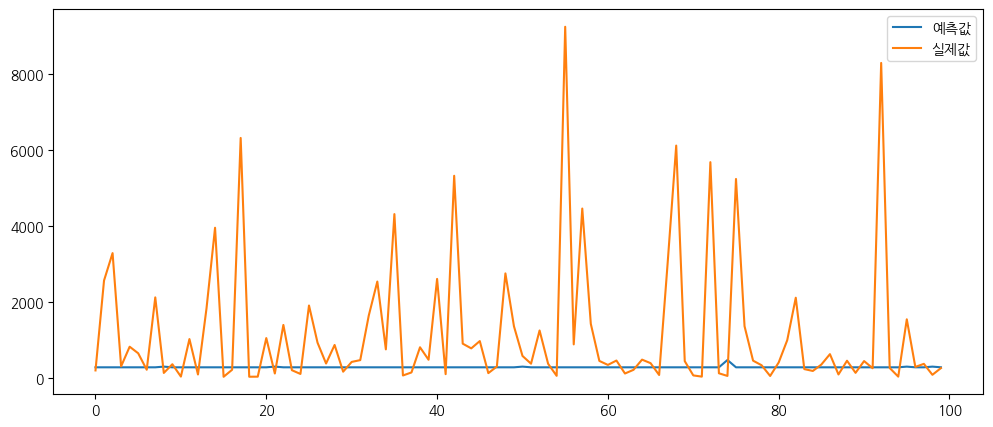

In [214]:
plt.figure(figsize=(12,5))
plt.plot(result_.index, result_['예측값'], linestyle='-', label='예측값');
plt.plot(result_.index, result_['실제값'], linestyle='-', label='실제값');
plt.legend()
plt.show()


In [210]:
x_test

,purchase_year,purchase_month,purchase_day,state_label
5844,2017,12,25,26
3228,2017,8,7,4
5806,2017,12,23,18
233,2017,2,1,6
5508,2017,12,7,13
...,...,...,...,...
3548,2017,8,25,15
5245,2017,11,24,22
3527,2017,8,24,12
5691,2017,12,17,6


- 지역 컬럼이 오히려 방해가 되는 것 같다. <br>
- 차라리 지역별 매출을 예측해보자. 날짜 빼고.


## 2. 지역별 매출 예측
- 2017 상반기 지역별 매출 학습하여 하반기 지역별 매출 예측하기

In [238]:
df = df5.copy()
df = df[['order_purchase_timestamp','customer_state','payment_value','freight_value']]
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].str[:10]
df_2017_half_1 = df[(df['order_purchase_timestamp']>='2017-01-01') & (df['order_purchase_timestamp']<'2017-07')]
df_2017_half_1 = df_2017_half_1.sort_values(by=['order_purchase_timestamp', 'customer_state']).reset_index(drop=True)
df_2017_half_1

,order_purchase_timestamp,customer_state,payment_value,freight_value
0,2017-01-05,BA,91.92,26.92
1,2017-01-05,ES,50.95,16.05
2,2017-01-05,PR,17.62,8.72
3,2017-01-05,PR,11.62,8.72
4,2017-01-05,PR,20.62,8.72
...,...,...,...,...
16889,2017-06-30,SP,62.78,7.78
16890,2017-06-30,SP,68.63,16.13
16891,2017-06-30,SP,148.06,18.16
16892,2017-06-30,SP,192.83,18.50


In [239]:
df_2017_half_1 = df_2017_half_1.drop(['order_purchase_timestamp'], axis=1)

In [240]:
df_2017_half_1

,customer_state,payment_value,freight_value
0,BA,91.92,26.92
1,ES,50.95,16.05
2,PR,17.62,8.72
3,PR,11.62,8.72
4,PR,20.62,8.72
...,...,...,...
16889,SP,62.78,7.78
16890,SP,68.63,16.13
16891,SP,148.06,18.16
16892,SP,192.83,18.50


In [241]:
# 라벨인코딩
le_state = LabelEncoder()

df_2017_half_1['state_label'] = le_state.fit_transform(df_2017_half_1['customer_state'])
df_2017_half_1['state_label'].unique(), le_state.classes_

(array([ 4,  7, 17, 25, 10, 19, 18, 23, 24, 22,  5,  8, 13,  6, 14, 12, 15,
        16,  0,  9, 11, 26,  1, 20,  2,  3, 21]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [244]:
df_2017_half_1

,customer_state,payment_value,freight_value,state_label
0,BA,91.92,26.92,4
1,ES,50.95,16.05,7
2,PR,17.62,8.72,17
3,PR,11.62,8.72,17
4,PR,20.62,8.72,17
...,...,...,...,...
16889,SP,62.78,7.78,25
16890,SP,68.63,16.13,25
16891,SP,148.06,18.16,25
16892,SP,192.83,18.50,25


In [246]:
X = df_2017_half_1.iloc[:, 2:]
y = df_2017_half_1.payment_value

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13515, 2), (3379, 2), (13515,), (3379,))

In [247]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [248]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
# result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
#                             'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
#                     columns=['no_scaler', 'normalizer', 'robust', 'min'])

result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])

result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,0.756359,0.794449,0.756851,0.756359
RandomForestRegressor,0.744575,0.804926,0.746921,0.744575
ExtraTreeRegressor,0.774742,0.819002,0.779315,0.774742
BaggingRegressor,0.751094,0.815969,0.756470,0.751094
DecisionTreeRegressor,0.782079,0.817842,0.785792,0.782079


In [249]:
from sklearn.model_selection import GridSearchCV

# 모델을 할당할 리스트 생성
estimators = []

# estimators 모델 추가
estimators.append(etsr)
estimators.append(rfr)
estimators.append(bgr)

# 파라미터 할당 리스트 생ㅅ어
params = []

# ExtraTreesRegressor
params_etsr = {'n_estimators':[50,100,150],
                'min_samples_split':[2,4,6,8],
                'max_depth':[2,5,10]}
params.append(params_etsr)

# RandomForestRegressor
params_rfr = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rfr)

# BaggingRegressor
params_bgr = {'bootstrap':[True,False],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_bgr)

def gridSearchCV(models, params):
    
    best_models=[]
    
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(x_train_robust, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators, params)
best_model_list

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


 33%|███▎      | 1/3 [00:06<00:12,  6.14s/it]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py", line 600, in _v

Fitting 5 folds for each of 20 candidates, totalling 100 fits


100%|██████████| 3/3 [00:36<00:00, 12.19s/it]


[ExtraTreesRegressor(max_depth=10, min_samples_split=8),
 RandomForestRegressor(min_samples_split=3, n_estimators=110),
 BaggingRegressor(n_estimators=120)]

In [250]:
print('ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse : ',rmsle(y_test, best_model_list[0].predict(x_test_robust)))
print('RandomForestRegressor(n_estimators=140) rmse : ',rmsle(y_test, best_model_list[1].predict(x_test_robust)))
print('BaggingRegressor(n_estimators=150) rmse : ',rmsle(y_test, best_model_list[2].predict(x_test_robust)))

ExtraTreesRegressor(min_samples_split=1, n_estimators=110) rmse :  0.9443565536113872
RandomForestRegressor(n_estimators=140) rmse :  0.7484195342955896
BaggingRegressor(n_estimators=150) rmse :  0.7462746586742983


#### 베스트 모델
BaggingRegressor(n_estimators=150) rmse :  0.7462746586742983

In [251]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round()
result['예측값'] = best_model_list[2].predict(x_test).round()
result['차이'] = abs(result['실제값'] - result['예측값'])
result

/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


,실제값,예측값,차이
9344,95.0,2164.0,2069.0
15932,33.0,1975.0,1942.0
10165,119.0,1170.0,1051.0
12783,112.0,2170.0,2058.0
11434,20.0,2231.0,2211.0
...,...,...,...
8381,44.0,2219.0,2175.0
70,27.0,2188.0,2161.0
11531,366.0,5084.0,4718.0
9896,783.0,2081.0,1298.0


In [256]:
result_ = result.reset_index(drop=True)
result_ = result_[:100]
result_

,실제값,예측값,차이
0,95.0,2164.0,2069.0
1,33.0,1975.0,1942.0
2,119.0,1170.0,1051.0
3,112.0,2170.0,2058.0
4,20.0,2231.0,2211.0
...,...,...,...
95,76.0,4041.0,3965.0
96,174.0,2170.0,1996.0
97,39.0,3348.0,3309.0
98,20.0,576.0,556.0


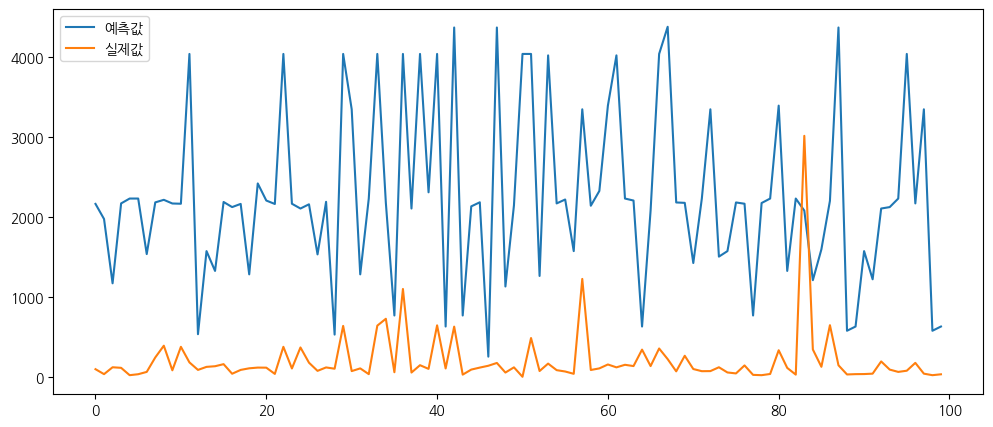

In [257]:
plt.figure(figsize=(12,5))
plt.plot(result_.index, result_['예측값'], linestyle='-', label='예측값');
plt.plot(result_.index, result_['실제값'], linestyle='-', label='실제값');
plt.legend()
plt.show()

### 지역별 월별 매출

In [410]:
df = df5.copy()
df = df[['order_purchase_timestamp','customer_state','payment_value']]
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].str[:10]

df_2017 = df[(df['order_purchase_timestamp']>='2017-01-01')&(df['order_purchase_timestamp']<'2018-04')].reset_index(drop=True)

df_2017['order_purchase_date'] = pd.to_datetime(df_2017['order_purchase_timestamp'])

df_2017['purchase_year'] = df_2017['order_purchase_date'].dt.year
df_2017['purchase_month'] = df_2017['order_purchase_date'].dt.month

df_2017 = df_2017.sort_values(by=['order_purchase_timestamp','customer_state'])
df_2017 = df_2017.drop(['order_purchase_date', 'order_purchase_timestamp'], axis=1)

df_2017 = df_2017[['purchase_year','purchase_month','customer_state','payment_value']].reset_index(drop=True)
df_2017

,purchase_year,purchase_month,customer_state,payment_value
0,2017,1,BA,91.92
1,2017,1,ES,50.95
2,2017,1,PR,17.62
3,2017,1,PR,11.62
4,2017,1,PR,20.62
...,...,...,...,...
77003,2018,3,SP,201.93
77004,2018,3,SP,124.07
77005,2018,3,SP,19.39
77006,2018,3,SP,55.79


In [411]:
df_2017_pivot = pd.pivot_table(data=df_2017, index=['purchase_year','purchase_month','customer_state'], values='payment_value', aggfunc='sum')
df_2017_pivot = df_2017_pivot.reset_index()
df_2017_pivot

,purchase_year,purchase_month,customer_state,payment_value
0,2017,1,AC,1657.33
1,2017,1,AL,748.78
2,2017,1,BA,5153.65
3,2017,1,CE,1266.13
4,2017,1,DF,2427.30
...,...,...,...,...
394,2018,3,RS,78221.98
395,2018,3,SC,53071.64
396,2018,3,SE,4029.20
397,2018,3,SP,563746.39


In [412]:
# 라벨인코딩
le_state = LabelEncoder()

df_2017_pivot['state_label'] = le_state.fit_transform(df_2017_pivot['customer_state'])
df_2017_pivot['state_label'].unique(), le_state.classes_

(array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 22, 23, 24, 25, 26,  2,  3, 21]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [413]:
df_2017_pivot = df_2017_pivot[['purchase_year','purchase_month','state_label','payment_value']]
df_2017_pivot

,purchase_year,purchase_month,state_label,payment_value
0,2017,1,0,1657.33
1,2017,1,1,748.78
2,2017,1,4,5153.65
3,2017,1,5,1266.13
4,2017,1,6,2427.30
...,...,...,...,...
394,2018,3,22,78221.98
395,2018,3,23,53071.64
396,2018,3,24,4029.20
397,2018,3,25,563746.39


In [414]:
X = df_2017_pivot.iloc[:, :-1]
y = df_2017_pivot['payment_value']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((319, 3), (80, 3), (319,), (80,))

In [416]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
# result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
#                             'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
#                     columns=['no_scaler', 'normalizer', 'robust', 'min'])

result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])

result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,0.893192,0.869468,0.923555,0.869468
RandomForestRegressor,0.689440,0.778501,0.763646,0.68944
ExtraTreeRegressor,0.903261,1.048800,1.168087,0.903261
BaggingRegressor,0.795205,0.822216,0.833590,0.795205
DecisionTreeRegressor,0.797549,0.787521,0.739487,0.739487


In [417]:
from sklearn.model_selection import GridSearchCV

# 모델을 할당할 리스트 생성
estimators = []

# estimators 모델 추가
estimators.append(rfr)
estimators.append(bgr)
estimators.append(dtr)

# 파라미터 할당 리스트 생ㅅ어
params = []

# RandomForestRegressor
params_rfr = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rfr)

# BaggingRegressor
params_bgr = {'bootstrap':[True,False],
             'n_estimators':[50,100,150]}
params.append(params_bgr)

# DecisionTreeRegressor
params_dtr = {'max_depth' : [20,40,60],
            'min_samples_split' : [1,2,3,4]}
params.append(params_dtr)

def gridSearchCV(models, params):
    
    best_models=[]
    
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(x_train, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators, params)
best_model_list

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py", line 600, in _v

Fitting 5 folds for each of 6 candidates, totalling 30 fits


 67%|██████▋   | 2/3 [00:03<00:01,  1.37s/it]/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/s

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[RandomForestRegressor(n_estimators=110),
 BaggingRegressor(n_estimators=150),
 DecisionTreeRegressor(max_depth=60, min_samples_split=3)]

In [418]:
print('RandomForestRegressor(n_estimators=110) rmse : ',rmsle(y_test, best_model_list[0].predict(x_test)))
print('BaggingRegressor(n_estimators=150) rmse : ',rmsle(y_test, best_model_list[1].predict(x_test)))
print('DecisionTreeRegressor(max_depth=60, min_samples_split=3) rmse : ',rmsle(y_test, best_model_list[2].predict(x_test)))

RandomForestRegressor(n_estimators=110) rmse :  0.7429641370030927
BaggingRegressor(n_estimators=150) rmse :  0.7302570904504374
DecisionTreeRegressor(max_depth=60, min_samples_split=3) rmse :  0.7259434356887119


#### 베스트 모델
DecisionTreeRegressor(max_depth=60, min_samples_split=3)

In [420]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round()
result['예측값'] = best_model_list[2].predict(x_test).round()
result['차이'] = abs(result['실제값'] - result['예측값'])
result

,실제값,예측값,차이
11,3764.0,3347.0,417.0
218,16641.0,15069.0,1572.0
235,3930.0,6102.0,2172.0
160,1929.0,424.0,1505.0
287,93315.0,61051.0,32264.0
...,...,...,...
60,3395.0,4283.0,888.0
315,6151.0,7840.0,1689.0
114,67662.0,61100.0,6562.0
250,19443.0,10640.0,8803.0


In [421]:
result_ = result.reset_index(drop=True)
result_

,실제값,예측값,차이
0,3764.0,3347.0,417.0
1,16641.0,15069.0,1572.0
2,3930.0,6102.0,2172.0
3,1929.0,424.0,1505.0
4,93315.0,61051.0,32264.0
...,...,...,...
75,3395.0,4283.0,888.0
76,6151.0,7840.0,1689.0
77,67662.0,61100.0,6562.0
78,19443.0,10640.0,8803.0


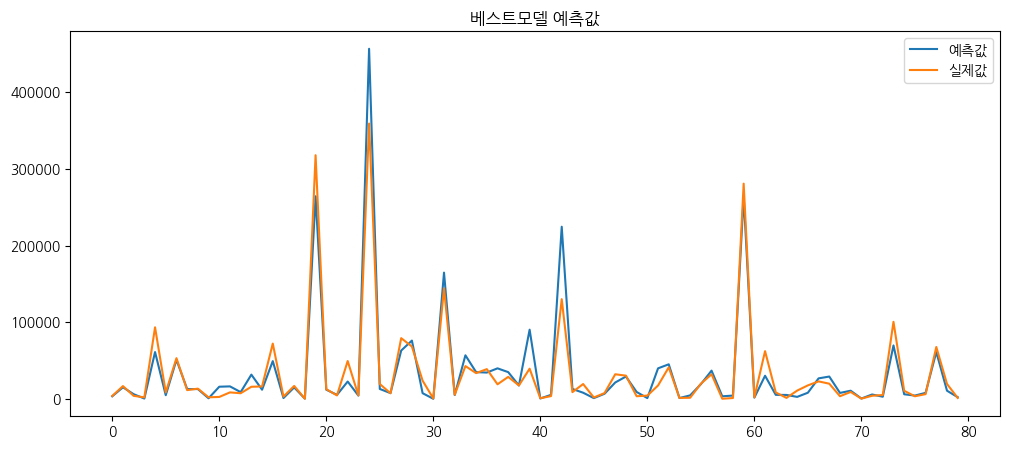

In [422]:
plt.figure(figsize=(12,5))
plt.plot(result_.index, result_['예측값'], linestyle='-', label='예측값');
plt.plot(result_.index, result_['실제값'], linestyle='-', label='실제값');
plt.title('베스트모델 예측값')
plt.legend()
plt.show()

### 주/월/분기 매출 예측
2018-05-01 - 2018-05-31 (월) 매출 예측 <br>
2018-04-01 - 2018-06-30 (분기) 매출 예측 <br>

In [423]:
df

,order_purchase_timestamp,customer_state,payment_value
0,2017-09-13,RJ,72.19
1,2017-06-28,GO,73.86
2,2018-05-18,MG,83.23
3,2017-08-01,PR,75.07
4,2017-08-10,MG,72.19
...,...,...,...
115604,2018-07-28,MG,77.50
115605,2018-07-23,SP,84.63
115606,2018-07-23,SP,84.63
115607,2018-08-23,SP,24.69


In [424]:
df_2018_04_06 = df[(df['order_purchase_timestamp']>='2018-04-01')&(df['order_purchase_timestamp']<'2018-07')].reset_index(drop=True)

df_2018_04_06['order_purchase_date'] = pd.to_datetime(df_2018_04_06['order_purchase_timestamp'])

df_2018_04_06['purchase_year'] = df_2018_04_06['order_purchase_date'].dt.year
df_2018_04_06['purchase_month'] = df_2018_04_06['order_purchase_date'].dt.month

df_2018_04_06 = df_2018_04_06.sort_values(by=['order_purchase_timestamp','customer_state'])
df_2018_04_06 = df_2018_04_06.drop(['order_purchase_date', 'order_purchase_timestamp'], axis=1)

df_2018_04_06 = df_2018_04_06[['purchase_year','purchase_month','customer_state','payment_value']].reset_index(drop=True)
df_2018_04_06

,purchase_year,purchase_month,customer_state,payment_value
0,2018,4,AP,154.99
1,2018,4,BA,277.48
2,2018,4,BA,277.48
3,2018,4,BA,80.90
4,2018,4,BA,65.06
...,...,...,...,...
23576,2018,6,SP,62.65
23577,2018,6,SP,62.00
23578,2018,6,SP,133.40
23579,2018,6,SP,48.83


In [425]:
df_2018_04_06_pivot = pd.pivot_table(data=df_2018_04_06, index=['purchase_year','purchase_month','customer_state'], values='payment_value', aggfunc='sum')
df_2018_04_06_pivot = df_2018_04_06_pivot.reset_index()
df_2018_04_06_pivot

,purchase_year,purchase_month,customer_state,payment_value
0,2018,4,AC,588.17
1,2018,4,AL,7707.45
2,2018,4,AM,893.49
3,2018,4,AP,1438.62
4,2018,4,BA,43761.46
...,...,...,...,...
76,2018,6,RS,60421.66
77,2018,6,SC,49964.96
78,2018,6,SE,8133.54
79,2018,6,SP,520013.01


In [430]:
df_2018_04_06_pivot2 = df_2018_04_06_pivot.copy()

# 라벨인코딩
le_state = LabelEncoder()

df_2018_04_06_pivot2['state_label'] = le_state.fit_transform(df_2018_04_06_pivot2['customer_state'])
df_2018_04_06_pivot2['state_label'].unique(), le_state.classes_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object))

In [432]:
df_2018_04_06_pivot2 = df_2018_04_06_pivot2.drop(['customer_state'], axis=1)
df_2018_04_06_pivot2 = df_2018_04_06_pivot2[['purchase_year','purchase_month','state_label','payment_value']]
df_2018_04_06_pivot2

,purchase_year,purchase_month,state_label,payment_value
0,2018,4,0,588.17
1,2018,4,1,7707.45
2,2018,4,2,893.49
3,2018,4,3,1438.62
4,2018,4,4,43761.46
...,...,...,...,...
76,2018,6,22,60421.66
77,2018,6,23,49964.96
78,2018,6,24,8133.54
79,2018,6,25,520013.01


In [436]:
x_test = df_2018_04_06_pivot2.iloc[:, :-1]
y_test = df_2018_04_06_pivot2['payment_value']

result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test

# 예측
result['예측값'] = best_model_list[2].predict(x_test)
result['차이'] = abs(result['실제값'] - result['예측값'])
result

,실제값,예측값,차이
0,588.17,299.220,288.950
1,7707.45,7483.945,223.505
2,893.49,1850.390,956.900
3,1438.62,686.235,752.385
4,43761.46,66194.550,22433.090
...,...,...,...
76,60421.66,76009.500,15587.840
77,49964.96,50912.480,947.520
78,8133.54,5701.485,2432.055
79,520013.01,563746.390,43733.380


In [437]:
result['차이'].mean().round(2)

7255.69

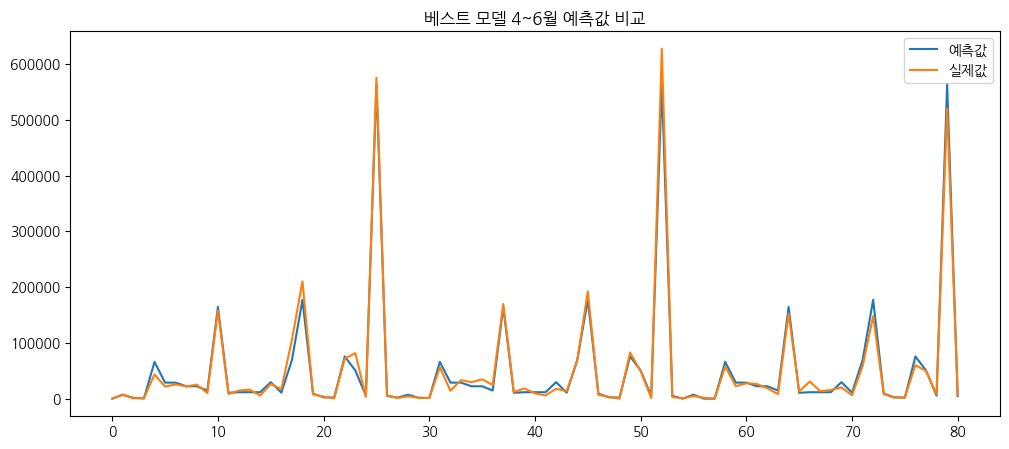

In [440]:
plt.figure(figsize=(12,5))
plt.plot(result['예측값'], linestyle='-', label='예측값');
plt.plot(result['실제값'], linestyle='-', label='실제값');
plt.title('베스트 모델 4~6월 예측값 비교')
plt.legend()
plt.show()

In [441]:
result

,실제값,예측값,차이
0,588.17,299.220,288.950
1,7707.45,7483.945,223.505
2,893.49,1850.390,956.900
3,1438.62,686.235,752.385
4,43761.46,66194.550,22433.090
...,...,...,...
76,60421.66,76009.500,15587.840
77,49964.96,50912.480,947.520
78,8133.54,5701.485,2432.055
79,520013.01,563746.390,43733.380


In [442]:
result['purchase_year'] = df_2018_04_06_pivot['purchase_year']
result['purchase_month'] = df_2018_04_06_pivot['purchase_month']
result['state_label'] = df_2018_04_06_pivot2['state_label']
result['customer_state'] = df_2018_04_06_pivot['customer_state']
result

,실제값,예측값,차이,purchase_year,purchase_month,state_label,customer_state
0,588.17,299.220,288.950,2018,4,0,AC
1,7707.45,7483.945,223.505,2018,4,1,AL
2,893.49,1850.390,956.900,2018,4,2,AM
3,1438.62,686.235,752.385,2018,4,3,AP
4,43761.46,66194.550,22433.090,2018,4,4,BA
...,...,...,...,...,...,...,...
76,60421.66,76009.500,15587.840,2018,6,22,RS
77,49964.96,50912.480,947.520,2018,6,23,SC
78,8133.54,5701.485,2432.055,2018,6,24,SE
79,520013.01,563746.390,43733.380,2018,6,25,SP


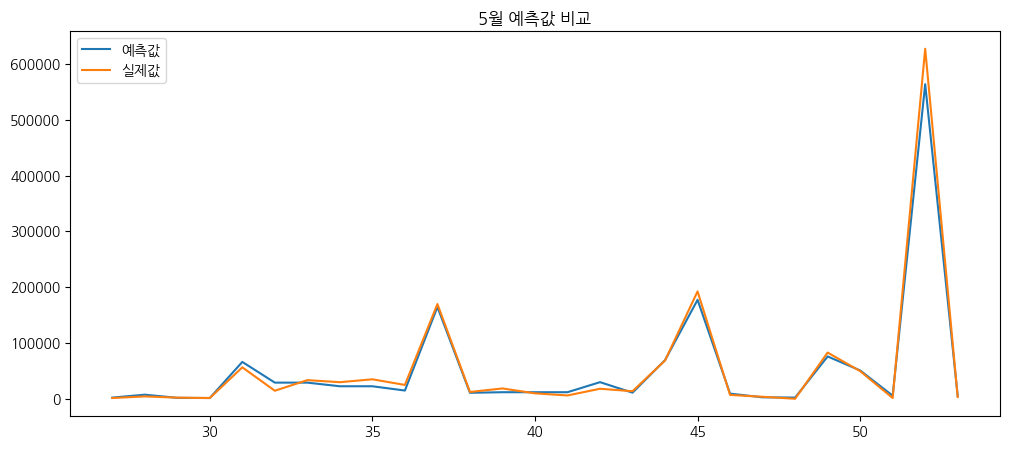

In [443]:
# 5월 매출 예측
predict_month = result[result['purchase_month']==5]

plt.figure(figsize=(12,5))
plt.plot(predict_month['예측값'], linestyle='-', label='예측값');
plt.plot(predict_month['실제값'], linestyle='-', label='실제값');
plt.title('5월 예측값 비교')
plt.legend()
plt.show()

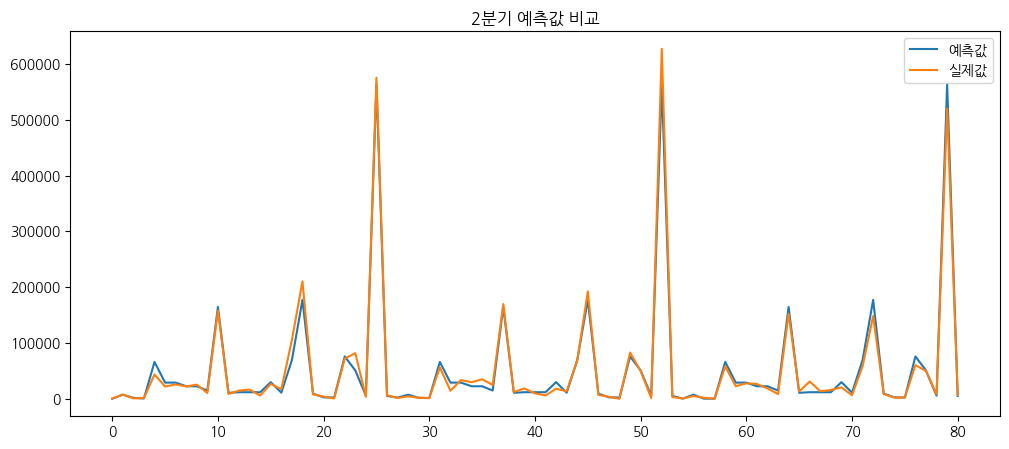

In [444]:
# 2분기(4~6월) 매출 예측
plt.figure(figsize=(12,5))
plt.plot(result['예측값'], linestyle='-', label='예측값');
plt.plot(result['실제값'], linestyle='-', label='실제값');
plt.title('2분기 예측값 비교')
plt.legend()
plt.show()

In [445]:
result

,실제값,예측값,차이,purchase_year,purchase_month,state_label,customer_state
0,588.17,299.220,288.950,2018,4,0,AC
1,7707.45,7483.945,223.505,2018,4,1,AL
2,893.49,1850.390,956.900,2018,4,2,AM
3,1438.62,686.235,752.385,2018,4,3,AP
4,43761.46,66194.550,22433.090,2018,4,4,BA
...,...,...,...,...,...,...,...
76,60421.66,76009.500,15587.840,2018,6,22,RS
77,49964.96,50912.480,947.520,2018,6,23,SC
78,8133.54,5701.485,2432.055,2018,6,24,SE
79,520013.01,563746.390,43733.380,2018,6,25,SP


#### 지역별 매출 예측하기

In [471]:
def predict_state_payment(state):
    predict_state = result[result['customer_state']==state]

    # 실제값
    real_4_values = predict_state.loc[predict_state['purchase_month']==4, '실제값']
    real_5_values = predict_state.loc[predict_state['purchase_month']==5, '실제값']
    real_6_values = predict_state.loc[predict_state['purchase_month']==6, '실제값']
    real_quarter_values = predict_state['실제값'].sum()

    # 예측값
    predict_4_values = predict_state.loc[predict_state['purchase_month']==4, '예측값']
    predict_5_values = predict_state.loc[predict_state['purchase_month']==5, '예측값']
    predict_6_values = predict_state.loc[predict_state['purchase_month']==6, '예측값']
    predict_quarter_values = predict_state['예측값'].sum()

    # 환율
    real_to_won = 266.12

    diff_df = pd.DataFrame(index=['4월', '5월', '6월', '2분기(4~6월)'], columns=['실제값', '예측값', '금액차이(R$)','금액차이(만원)', '실제값과 차이 비율'])
    diff_df['실제값'] = [real_4_values, real_5_values, real_6_values, real_quarter_values]
    diff_df['예측값'] = [predict_4_values, predict_5_values, predict_6_values, predict_quarter_values]

    diff_df['실제값'] = diff_df['실제값'].astype(int)
    diff_df['예측값'] = diff_df['예측값'].astype(int)
    diff_df['금액차이(R$)'] = abs(diff_df['실제값'] - diff_df['예측값'])
    diff_df['금액차이(만원)'] = diff_df['금액차이(R$)'] * real_to_won
    diff_df['실제값과 차이 비율'] = round(diff_df['금액차이(R$)'] / diff_df['실제값'] * 100, 2)

    return diff_df

In [474]:
# 상파울루 주 예측
predict_state_payment('SP')

,실제값,예측값,금액차이(R$),금액차이(만원),실제값과 차이 비율
4월,575337,563746,11591,3084596.92,2.01
5월,627202,563746,63456,16886910.72,10.12
6월,520013,563746,43733,11638225.96,8.41
2분기(4~6월),1722553,1691239,31314,8333281.68,1.82


In [475]:
# 미나스제라이스 주 예측
predict_state_payment('MG')

,실제값,예측값,금액차이(R$),금액차이(만원),실제값과 차이 비율
4월,158104,164653,6549,1742819.88,4.14
5월,169874,164653,5221,1389412.52,3.07
6월,152687,164653,11966,3184391.92,7.84
2분기(4~6월),480666,493961,13295,3538065.40,2.77


In [476]:
# 호라이마주 예측
predict_state_payment('RR')

,실제값,예측값,금액차이(R$),금액차이(만원),실제값과 차이 비율
4월,772,2341,1569,417542.28,203.24
5월,171,2341,2170,577480.40,1269.01
6월,2520,2341,179,47635.48,7.10
2분기(4~6월),3463,7025,3562,947919.44,102.86


데이터가 많았던 주들은 잘 예측했지만, 데이터가 적었던 지역은 예측을 잘 하지 못한다. 

In [485]:
def draw_predict_val_state(state, state_kor):
    predict_state = result[result['customer_state']==state]
    title = state_kor + ' 주 예측값 비교'
    
    plt.figure(figsize=(6,3))
    plt.plot(predict_state['예측값'], linestyle='-', label='예측값');
    plt.plot(predict_state['실제값'], linestyle='-', label='실제값');
    plt.title(title)
    plt.legend()
    plt.show()

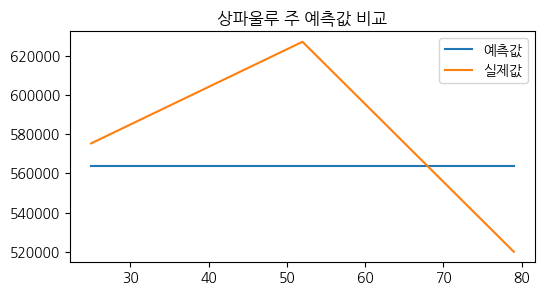

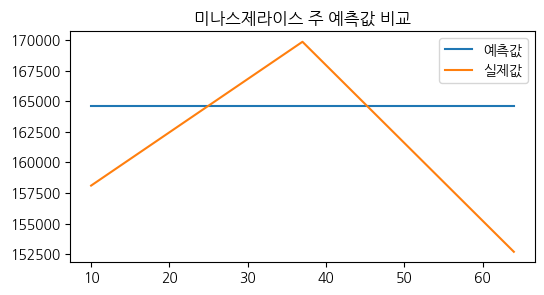

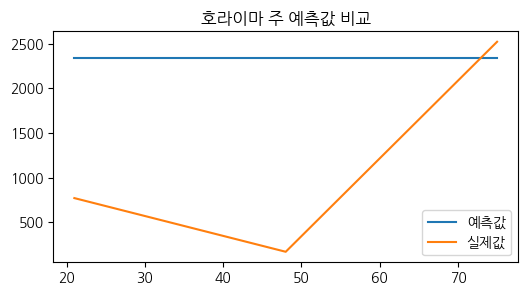

In [486]:
draw_predict_val_state('SP', '상파울루')
draw_predict_val_state('MG', '미나스제라이스')
draw_predict_val_state('RR', '호라이마')